# The Sparks Foundation
Data Science & Business Analytics Internship.


**TASK 2: Prediction Using Unsupervised ML**

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import warnings as wg
wg.filterwarnings("ignore")
import seaborn as sns

**Load the Iris Dataset**

In [128]:
data=pd.read_csv("Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [129]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [130]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Visuilising the Data**

In [197]:
data.shape

(150, 5)

In [132]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [134]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

#check the Null value

In [135]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [149]:
##dropping the first column = Id
data=data.drop(columns="Id")
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [142]:
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


**plot the graphs between SepalLengthCm and SepalWidthCm**

<function matplotlib.pyplot.show(*args, **kw)>

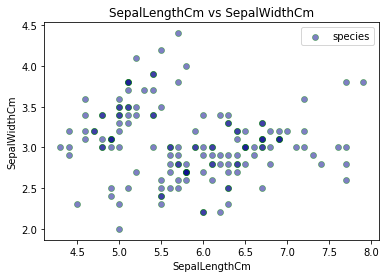

In [143]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=data, label="species", alpha=0.5, color="darkblue", edgecolor="green")
plt.title('SepalLengthCm vs SepalWidthCm',fontsize=12)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

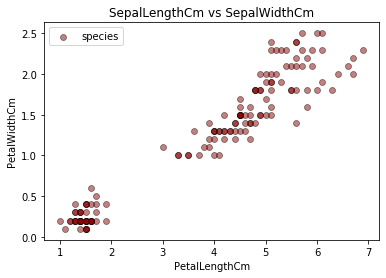

In [144]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=data, label="species", alpha=0.5, color="darkred", edgecolor="black")
plt.title('SepalLengthCm vs SepalWidthCm',fontsize=12)
plt.show

**Applying kmeans algorithm**

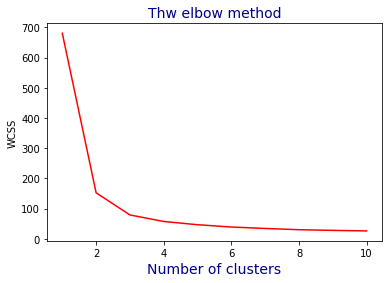

In [161]:
from sklearn.cluster import KMeans
x = data.iloc[:, [0,1,2,3]].values
features = data.loc[:,["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm" ]]
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, color='red')  
plt.title('Thw elbow method', fontsize=14, color='darkblue')
plt.xlabel('Number of clusters', fontsize=14, color='darkblue')
plt.ylabel('WCSS')
plt.show()

from the above graph, we can clearly say that the optimum cluster occurs at 3.

In [153]:
#creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = kmeans.fit_predict(x)

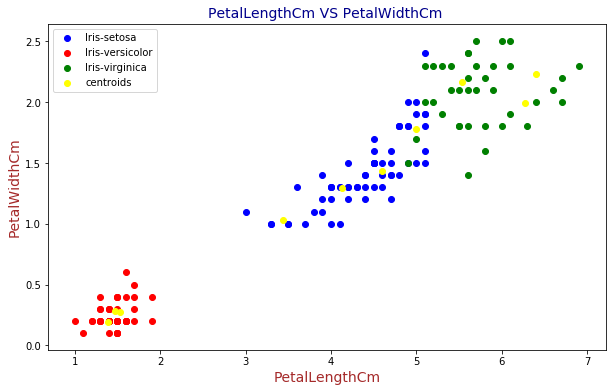

In [175]:
#visualization of kmeans algorithm.
plt.figure(figsize=(10,6))
plt.scatter(x[y_means == 0,2],x[y_means == 0,3],label='Iris-setosa', color='blue')
plt.scatter(x[y_means == 1,2],x[y_means == 1,3],label='Iris-versicolor', color='red')
plt.scatter(x[y_means == 2,2],x[y_means == 2,3],label='Iris-virginica', color='green')
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],label = 'centroids', color = 'yellow')
plt.title("PetalLengthCm VS PetalWidthCm ", fontsize=14, color = 'darkblue')
plt.xlabel('PetalLengthCm', fontsize=14, color = 'brown')
plt.ylabel('PetalWidthCm', fontsize=14, color = 'brown')
plt.legend()
plt.show()

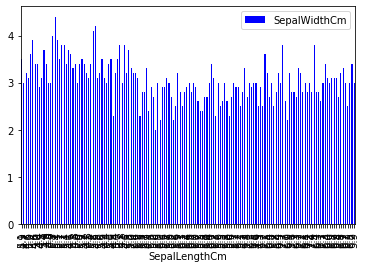

In [180]:
data.plot(kind="bar", x="SepalLengthCm", y="SepalWidthCm", color="blue")

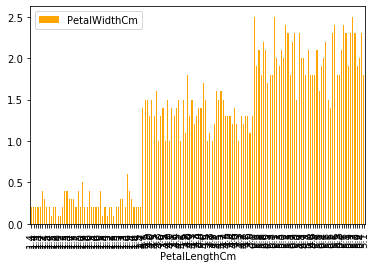

In [181]:
data.plot(kind="bar", x="PetalLengthCm", y="PetalWidthCm", color="orange")

In [182]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


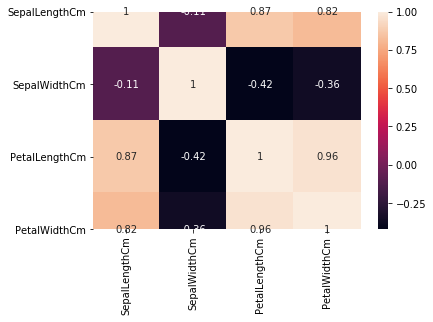

In [194]:
corrmatrix = data.corr()
sns.heatmap(corrmatrix, annot=True)
corrmatrix.style.background_gradient(cmap='coolwarm').set_precision(2)
corrmatrix.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '0pt'})

plt.show()

In [196]:
**Thank You!!**